In [1]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster

# Ab42

In [2]:
ap = 4
#get pairwise distance
data = np.load(f'./ab42/Ap{ap}-Ab-ctm-all.npy')
'''
distance_matrix = pdist(data, 'euclidean')
np.save(f'distance_matrix_ap{ap}.npy',distance_matrix)
'''

"\ndistance_matrix = pdist(data, 'euclidean')\nnp.save(f'distance_matrix_ap{ap}.npy',distance_matrix)\n"

In [3]:
#Calculate the distance matrix and perform hierarchical clustering using the linkage function
distance_matrix = np.load(f'distance_matrix_ap{ap}.npy')
method = 'ward'
Z = linkage(distance_matrix, method=method)

In [4]:
#Cut the tree to form clusters
n_k = 15
clusters = fcluster(Z, n_k, criterion='maxclust')

In [55]:
# combine the data and cluster labels into a single DataFrame
data_with_clusters = pd.DataFrame(data)
data_with_clusters['cluster_label'] = clusters
ctm_label = [hang.strip('\n') for hang in open(f'./ab42/ap{ap}_ctm_labels.txt')]
#49th_trj-9m-9301th_frame
data_with_clusters['trj'] = [int((lb.split('-')[0])[:-6]) for lb in ctm_label]
data_with_clusters['time'] = [int((lb.split('-')[1])[:-1]) for lb in ctm_label]
data_with_clusters['frame'] = [int((lb.split('-')[2])[:-8]) for lb in ctm_label]
data_with_clusters['ctm_label'] = [hang.strip('\n') for hang in open(f'./ab42/ap{ap}_ctm_labels.txt')]

In [56]:
# Compute the centroid for each cluster df.drop(columns=['A'])
centroids = data_with_clusters.drop(columns=['ctm_label','trj','time','frame']).groupby('cluster_label').mean().values
#centroids
cluster_sizes = data_with_clusters.drop(columns=['ctm_label','trj','time','frame']).groupby('cluster_label').size().values
cluster_sizes

array([  101,   385,   262,   206, 14038,   211,   103,  1261,  6916,
          95,   100,   111,   211,   215,   235], dtype=int64)

In [59]:
centroid_id = []
for i in range(1,n_k+1):
    each_cluster = data_with_clusters.loc[data_with_clusters['cluster_label'] == i]
    each_cluster_data = each_cluster.drop(columns=['cluster_label','ctm_label','trj','time','frame'])
    distances = each_cluster_data.apply(lambda row: np.linalg.norm(row.to_numpy() - centroids[i-1]),axis=1)
    centroid_id.append(distances.idxmin())

In [60]:
centroid_id

[22589,
 22630,
 5161,
 9009,
 0,
 10577,
 1816,
 9139,
 5555,
 16750,
 2863,
 5032,
 4307,
 23262,
 10223]

In [61]:
for id in centroid_id:
    print(data_with_clusters.iloc[id]['ctm_label'])

47th_trj-5m-8101th_frame
47th_trj-6m-2201th_frame
11th_trj-7m-5501th_frame
19th_trj-7m-401th_frame
1th_trj-5m-1th_frame
22th_trj-8m-1th_frame
4th_trj-8m-5401th_frame
19th_trj-8m-4101th_frame
12th_trj-6m-6301th_frame
35th_trj-5m-4701th_frame
6th_trj-9m-2901th_frame
11th_trj-6m-2601th_frame
9th_trj-8m-8801th_frame
48th_trj-7m-6801th_frame
21th_trj-9m-3701th_frame


In [64]:
data_with_clusters.loc[(data_with_clusters['cluster_label']==2)&(data_with_clusters['trj']==47)]

,0,1,2,3,4,5,6,7,8,9,...,6043,6044,6045,6046,6047,cluster_label,trj,time,frame,ctm_label
22609,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2,47,6,101,47th_trj-6m-101th_frame
22610,0.0,0.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2,47,6,201,47th_trj-6m-201th_frame
22611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2,47,6,301,47th_trj-6m-301th_frame
22612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2,47,6,401,47th_trj-6m-401th_frame
22613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2,47,6,501,47th_trj-6m-501th_frame
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2,47,9,8901,47th_trj-9m-8901th_frame
22990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2,47,9,9001,47th_trj-9m-9001th_frame
22991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2,47,9,9101,47th_trj-9m-9101th_frame
22992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2,47,9,9201,47th_trj-9m-9201th_frame


In [10]:
plt.figure(figsize=(14, 8))
R = dendrogram(Z,p=n_k,truncate_mode='lastp',no_plot=True)

<Figure size 1400x800 with 0 Axes>

In [11]:
#change label for dendrogram leaves
temp = {R["leaves"][ii]:(ii+1, cluster_sizes[ii]/len(data)*100) for ii in range(len(R["leaves"]))}
def llf(xx):
     return 'C{} {}%'.format(temp[xx][0],'%.2f'%temp[xx][1])

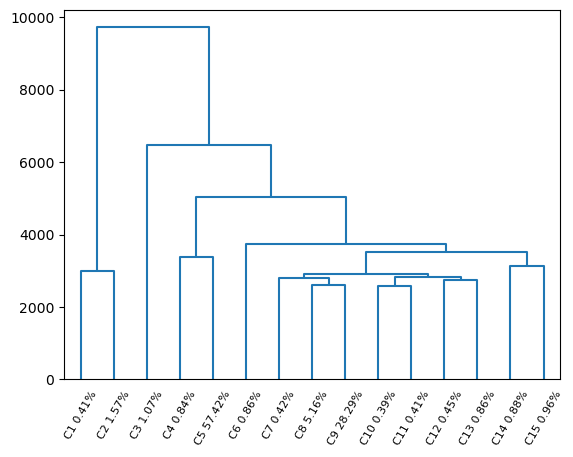

In [12]:
R = dendrogram(Z,p=n_k,truncate_mode='lastp',leaf_label_func=llf,leaf_rotation=60, leaf_font_size=8,color_threshold=1400)

# Ab40

In [ ]:
# loacate centroid id to micie files
def line2movie(n):
    movie_series = [i for i in range(500,5000,500)]
    if n%50 == 0:
        no_trj = n//50
    else:
        no_trj = n//50+1
    if n%50 == 0:
        seq_line = 50
    else:
        seq_line = n%50
    if no_trj%50 == 0:
        cl = no_trj//50
        trj = 50
    else:
        cl = no_trj//50+1
        trj = no_trj%50
    if seq_line%50 == 0:
        time_period = seq_line//10 + 11
        snap = 5000
    else:
        time_period = seq_line//10+1 + 11
        snap = movie_series[seq_line%10-1]
    return 'cl={} j={} time_period={} snapshot={}'.format(cl,trj,time_period,snap)
for i in range(len(centroid_id)):
    print(f'Cluster: {i+1} '+line2movie(centroid_id[i]))

In [ ]:
plt.figure(figsize=(14, 8))
R = dendrogram(Z,p=n_k,truncate_mode='lastp',no_plot=True)
#print("values passed to leaf_label_func\nleaves : ", R["leaves"])
#print(R['ivl'])

In [ ]:
#change label for dendrogram leaves
temp = {R["leaves"][ii]:(ii+1, cluster_sizes[ii]/len(data)*100) for ii in range(len(R["leaves"]))}
def llf(xx):
     return 'C:{} {}%'.format(temp[xx][0],'%.2f'%temp[xx][1])

In [ ]:
R = dendrogram(Z,p=n_k,truncate_mode='lastp',leaf_label_func=llf,leaf_rotation=60, leaf_font_size=8,color_threshold=1400)

In [ ]:
type(cluster_sizes)

In [ ]:
cluster_sizes/(len(data)-cluster_sizes[0]-cluster_sizes[12])*100

In [ ]:
cluster_sizes[0]

In [ ]:
cluster_sizes[12]